<a href="https://colab.research.google.com/github/Rukiem/Capstone-Project/blob/main/Vehicle_Trade_Data_set_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
furl = "https://raw.githubusercontent.com/Rukiem/Capstone-Project/main/vehicle_trade_data.csv?token=GHSAT0AAAAAABSTZ3Q62ZQOXU4DI2AY6U5EYRTSXUQ"
data = pd.read_csv(furl)

In [ ]:
data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,202010014440649,31534.0,17,Grey,MINI,Hatch,USED,2017.0,19000,Hatchback,False,Petrol,MINI - Hatch,5
1,202010155026725,52023.0,66,Blue,Volkswagen,Golf,USED,2016.0,13500,Estate,False,Diesel,Volkswagen - Golf,6
2,202008142485309,29500.0,12,Grey,Mercedes-Benz,C Class,USED,2012.0,9495,Saloon,False,Petrol,Mercedes-Benz - C Class,10
3,202009183894045,35300.0,18,Grey,Vauxhall,Corsa,USED,2018.0,7293,Hatchback,False,Petrol,Vauxhall - Corsa,4
4,202010014441671,47299.0,65,Black,Nissan,Qashqai,USED,2016.0,11500,SUV,False,Diesel,Nissan - Qashqai,6


In [ ]:
data.describe()

,public_reference,mileage,year_of_registration,price,age
count,9.626900e+04,96247.000000,96269.000000,96269.000000,96269.000000
mean,2.020082e+14,42964.067150,2015.096075,12266.081615,6.903925
std,1.194558e+10,34051.708175,3.766205,7414.823331,3.766205
min,2.014120e+14,0.000000,1962.000000,200.000000,2.000000
25%,2.020091e+14,17000.000000,2013.000000,6999.000000,4.000000
50%,2.020100e+14,34352.000000,2016.000000,11030.000000,6.000000
75%,2.020102e+14,62000.000000,2018.000000,15999.000000,9.000000
max,2.020110e+14,999999.000000,2020.000000,158500.000000,60.000000


In [ ]:
data.describe(include = "O")

,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,make_model
count,96257,96269,96269,96269,96269,96269,96269,96269
unique,58,5,11,19,1,5,2,19
top,17,Black,BMW,Golf,USED,Hatchback,Petrol,Volkswagen - Golf
freq,10218,26479,16585,8975,96269,59227,54805,8975


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96269 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96269 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96257 non-null  object 
 3   standard_colour        96269 non-null  object 
 4   standard_make          96269 non-null  object 
 5   standard_model         96269 non-null  object 
 6   vehicle_condition      96269 non-null  object 
 7   year_of_registration   96269 non-null  float64
 8   price                  96269 non-null  int64  
 9   body_type              96269 non-null  object 
 10  crossover_car_and_van  96269 non-null  bool   
 11  fuel_type              96269 non-null  object 
 12  make_model             96269 non-null  object 
 13  age                    96269 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

#UNDERSTANDING DATA COLUMNS
* `public_reference`: unable to get actionable information on this variable
* `mileage`: distance the vehicle travelled throughout it's lifetime.
* `reg_code`: unable to get actionable information on this variable
* `standard_make`: Car brand
   - **MINI**
   - **Volkswagen**
   - **Mercedes-Benz**
   - **Vauxhall**
   - **Nissan**
   - **Toyota**
   - **Audi**
   - **Renault**
   - **BMW**
   - **Fiat**
   - **Kia**
* `standard_colour`: vehicle colour at the time of sales
   - **Black**
   - **Grey**
   - **Blue**
   - **Silver**
   - **White**
* `standard_model`: vehicle model name
   **['Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo','Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series','1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke']**
* `vehicle_condition`: the state of the vehicle
   - **USED**
* `year_of_registration`: 
* `price`: cost of vehicle
* `body_type`: body shape of vehicle
   - **Hatchback**
   - **Estate**
   - **Saloon**
   - **SUV**
   - **Coupe**
* `crossover_car_and_van`: if a vehicle is a van and a car
   - **FALSE**
* `fuel_type`: fuel the vehicle uses
   - **Petrol**
   - **Diesel**
* `make_model`: combination of make and model
* `age`: year vehicle was bought taken from current year

In [ ]:
data.standard_make.unique()

array(['MINI', 'Volkswagen', 'Mercedes-Benz', 'Vauxhall', 'Nissan',
       'Toyota', 'Audi', 'Renault', 'BMW', 'Fiat', 'Kia'], dtype=object)

In [ ]:
data.standard_colour.unique()

array(['Grey', 'Blue', 'Black', 'Silver', 'White'], dtype=object)

In [ ]:
data.body_type.unique()

array(['Hatchback', 'Estate', 'Saloon', 'SUV', 'Coupe'], dtype=object)

In [ ]:
data.standard_model.unique()

array(['Hatch', 'Golf', 'C Class', 'Corsa', 'Qashqai', 'Yaris', 'Polo',
       'Astra', 'A1', 'E Class', 'Clio', 'A Class', '5 Series',
       '1 Series', '500', 'A3', 'Sportage', '3 Series', 'Juke'],
      dtype=object)

In [ ]:
data.body_type.value_counts()

Hatchback    59227
Saloon       14235
SUV          13202
Estate        6095
Coupe         3510
Name: body_type, dtype: int64

In [ ]:
total_make = data.standard_make.value_counts()

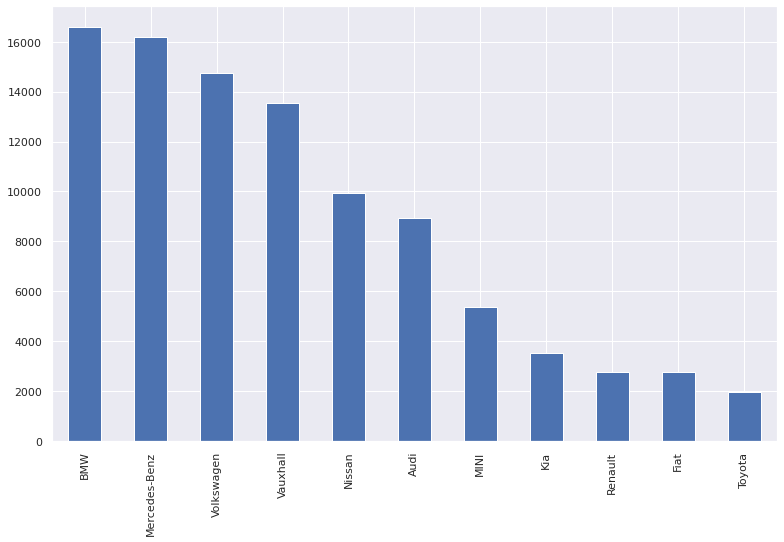

In [ ]:
total_make.plot(kind = "bar")

In [ ]:
total_color = data.standard_colour.value_counts()
total_color

Black     26479
White     21326
Grey      16986
Silver    15767
Blue      15711
Name: standard_colour, dtype: int64

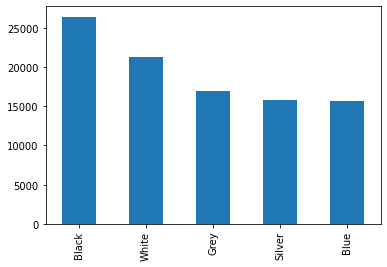

In [ ]:
total_color.plot(kind="bar")

**Quantitative and Qualitative Data**

We shall proceed to look at statistics of both the `qualitative` and `numeric` values in order to further appreciate the data.

**Quantitative Data**
* `mileage` has a total of 96247 non-null values out of a total of 96269 entries, which means there are missing values. It's metrics are as follows:
   - `Average mileage` ~ 42954.25
   - 'Maximum mileage` = 999999.0
   - `Standard deviation` = 34051.53
* `year of registration` has a total of 96269 non- null values, i.e there are no missing values. Metrics are as follows:
   - `Average year` = 2015
   - `Maximum year` = 2020
   - `Standard deviation` = 3.8
* `price` has a total of 96269 non- null values, i.e there are no missing values. Metrics are as follows:
   - `Average price` = 12266.08
   - `Maximum price` = 158500
   - `Standard deviation` = 7414.78
* `age' has a total of 96269 non- null values, i.e there are no missing values. Metrics are as follows:
   - `Average age` ~ 7
   - `Maximum age` = 60
   - `Standard deviation`= 3.8

**Qualitative Data**
* `standard colour`: it's metrics:
  - most occurrent: `Black`
  - percent: 27.5%
* `standard model`: it's metrics:
  - most occurrent: `Golf`
  - percent: 9.3%
* `standard make`: it's metrics:
  - most occurrent: `BMW`
  - percent: 17.2%
* `body type`: it's metrics:
  - most occurrent: `Hatchback`
  - percent: 61.5%
* `fuel type`: it's metrics:
  - most occurrent: `Petrol`
  - percent: 56.9%

In [ ]:
#data.mileage.sum()/len(data.mileage)
#data.price.sum()/len(data.price)
#data.year_of_registration.sum()/len(data.year_of_registration)
data.age.sum()/len(data.age)

6.903925458870456

In [ ]:
#data.mileage.max()
#data.price.max()
#data.year_of_registration.max()
data.age.max()

60

In [ ]:
#np.std(data.mileage)
#np.std(data.price)
#np.std(data.year_of_registration)
np.std(data.age)

3.766185720915794

In [ ]:
sum_black=(data['standard_colour']=='Black').sum()
(sum_black/len(data.standard_colour))*100

27.5052197488288

In [ ]:
sum_black=(data['fuel_type']=='Petrol').sum()
(sum_black/len(data.fuel_type))*100

56.92902180348815

Text(0, 0.5, 'Price')

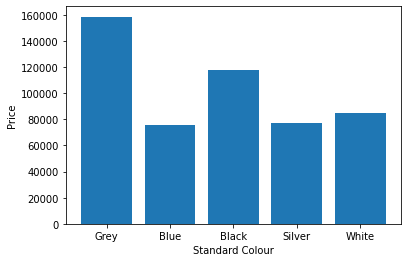

In [ ]:
plt.bar(data.standard_colour, data.price)
plt.xlabel("Standard Colour")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

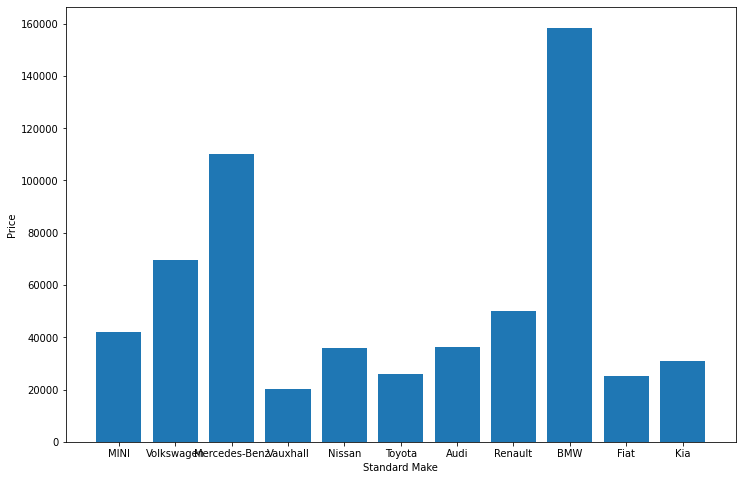

In [ ]:
plt.figure(figsize= (12,8))
plt.bar(data.standard_make, data.price)
plt.xlabel("Standard Make")
plt.ylabel("Price")

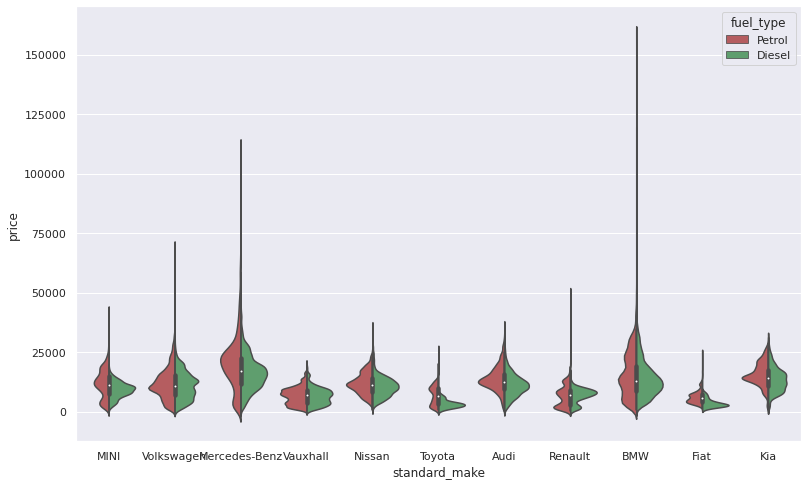

In [ ]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.violinplot(x="standard_make", y="price", hue="fuel_type", data=data,split = True, palette={"Petrol": "r", "Diesel": "g"})

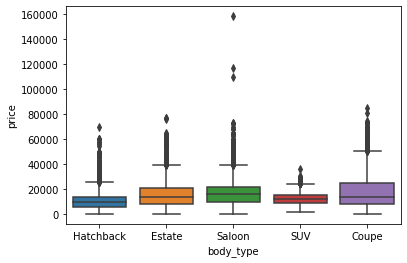

In [ ]:
sns.boxplot(data = data, x = "body_type", y = "price")

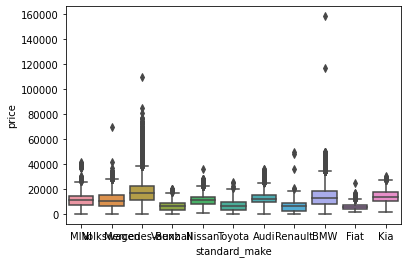

In [ ]:
sns.boxplot(data = data, x = "standard_make", y = "price")

**Data Cleaning**

In [ ]:
for col in data.columns.tolist():          
        print('{} column missing values: {}'.format(col, data[col].isnull().sum()))

public_reference column missing values: 0
mileage column missing values: 22
reg_code column missing values: 12
standard_colour column missing values: 0
standard_make column missing values: 0
standard_model column missing values: 0
vehicle_condition column missing values: 0
year_of_registration column missing values: 0
price column missing values: 0
body_type column missing values: 0
crossover_car_and_van column missing values: 0
fuel_type column missing values: 0
make_model column missing values: 0
age column missing values: 0


In [ ]:
clean_data = data[~data.mileage.isnull()]

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96247 entries, 0 to 96268
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       96247 non-null  int64  
 1   mileage                96247 non-null  float64
 2   reg_code               96235 non-null  object 
 3   standard_colour        96247 non-null  object 
 4   standard_make          96247 non-null  object 
 5   standard_model         96247 non-null  object 
 6   vehicle_condition      96247 non-null  object 
 7   year_of_registration   96247 non-null  float64
 8   price                  96247 non-null  int64  
 9   body_type              96247 non-null  object 
 10  crossover_car_and_van  96247 non-null  bool   
 11  fuel_type              96247 non-null  object 
 12  make_model             96247 non-null  object 
 13  age                    96247 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(8)
memory usa

As the `public_reference`, `reg_code`, `vehicle_condition` and `crossover_car_nad_van` columns don't provide useful correlation to price they'll be dropped.

In [ ]:
clean_data = clean_data.drop(['reg_code', 'public_reference', 'crossover_car_and_van', 'vehicle_condition'], axis= 1)

In [ ]:
clean_data.head()

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
0,31534.0,2,4,13,2017.0,19000,2,1,7,5
1,52023.0,1,10,12,2016.0,13500,1,0,17,6
2,29500.0,2,5,8,2012.0,9495,4,1,9,10
3,35300.0,2,9,10,2018.0,7293,2,1,16,4
4,47299.0,0,6,16,2016.0,11500,3,0,12,6


In [ ]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    
    print("IQR value for column {} is: {}".format(col, IQR))
    global outlier_free_list
    global filtered_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]
    return filtered_data

In [ ]:
outlier_free_mileage = removeOutliers(clean_data, 'mileage')
outlier_free_pri =   removeOutliers(outlier_free_mileage, 'year_of_registration')
outlier_free_data =    removeOutliers(outlier_free_pri, "price")
#outlier_free_pri.head()

IQR value for column mileage is: 45000.0
IQR value for column year_of_registration is: 5.0
IQR value for column price is: 8799.0


In [ ]:
for col in outlier_free_data.columns.tolist():          
        print('{} column missing values: {}'.format(col, outlier_free_data[col].isnull().sum()))

mileage column missing values: 0
standard_colour column missing values: 0
standard_make column missing values: 0
standard_model column missing values: 0
vehicle_condition column missing values: 0
year_of_registration column missing values: 0
price column missing values: 0
body_type column missing values: 0
crossover_car_and_van column missing values: 0
fuel_type column missing values: 0
make_model column missing values: 0
age column missing values: 0


In [ ]:
clean_df = outlier_free_data

In [ ]:
clean_df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,make_model,age
0,31534.0,2,4,13,USED,2017.0,19000,2,False,1,7,5
1,52023.0,1,10,12,USED,2016.0,13500,1,False,0,17,6
2,29500.0,2,5,8,USED,2012.0,9495,4,False,1,9,10
3,35300.0,2,9,10,USED,2018.0,7293,2,False,1,16,4
4,47299.0,0,6,16,USED,2016.0,11500,3,False,0,12,6


In [ ]:
len(clean_df.mileage)

90181

**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.metrics import r2_score
#r2_score(y_train, y_train_pred)

In [ ]:
model = LinearRegression()

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
clean_df['standard_colour'] = le.fit_transform(clean_df['standard_colour'])
clean_df['standard_make'] = le.fit_transform(clean_df['standard_make'])
clean_df['standard_model'] = le.fit_transform(clean_df['standard_model'])
clean_df['body_type'] = le.fit_transform(clean_df['body_type'])
clean_df['fuel_type'] = le.fit_transform(clean_df['fuel_type'])
clean_df['make_model'] = le.fit_transform(clean_df['make_model'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
clean_df.head(3)

,mileage,standard_colour,standard_make,standard_model,year_of_registration,price,body_type,fuel_type,make_model,age
0,31534.0,2,4,13,2017.0,19000,2,1,7,5
1,52023.0,1,10,12,2016.0,13500,1,0,17,6
2,29500.0,2,5,8,2012.0,9495,4,1,9,10


In [ ]:
a = clean_df.loc[:, clean_data.columns != "price"]
b = clean_df.price

In [ ]:
a.head(3)

,mileage,standard_colour,standard_make,standard_model,year_of_registration,body_type,fuel_type,make_model,age
0,31534.0,2,4,13,2017.0,2,1,7,5
1,52023.0,1,10,12,2016.0,1,0,17,6
2,29500.0,2,5,8,2012.0,4,1,9,10


In [ ]:
a_test, a_train, b_test, b_train = train_test_split(a, b, test_size = 0.7, train_size = 0.3, random_state = 20)

In [ ]:
model.fit(a_train, b_train)

LinearRegression()

In [ ]:
b_predt = model.predict(a_train)
b_predt

array([17166.14763593,  8380.78283564,  -967.69299784, ...,
       13050.99244183,  7997.88883138, 15795.85333554])

In [ ]:
b_preds = model.predict(a_test)

In [ ]:
error = b_test -

In [ ]:
model.predict([[31534.0,2, 4,13,2017.0,2,1,7,5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13977.32935058])

In [ ]:
model.coef_

array([-5.47889730e-02, -5.84775591e+01,  1.63143933e+02, -3.14454541e+01,
        5.04946641e+02,  4.31567241e+02, -2.02832704e+03, -2.90983330e+02,
       -5.04946641e+02])

In [ ]:
model.intercept_

-997576.7815710098

In [ ]:
error = b_train - b_predt

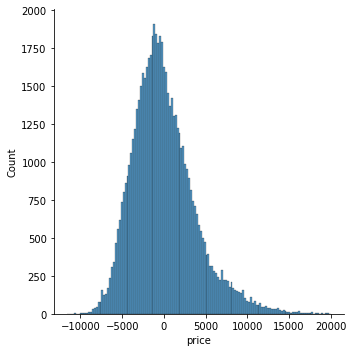

In [ ]:
sns.displot(error)

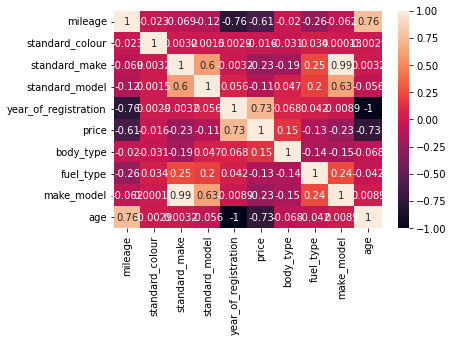

In [ ]:
sns.heatmap(clean_df.corr(), annot = True)
plt.show()

In [ ]:
b_test_pred = model.predict(a_test)
r2_score(b_test, b_test_pred)

0.6194706442022504

Approximately 61% of the data set fits the linear regression model.